In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 500)
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler


In [2]:
train_df = pd.read_csv('data/contest_train.csv')
train_df.drop('ID',axis=1,inplace=True)
# 1
print('train_df_shape = ',train_df.shape)
print(train_df.columns)

train_df_shape =  (9999, 102)
Index(['TARGET', 'FEATURE_0', 'FEATURE_1', 'FEATURE_2', 'FEATURE_3',
       'FEATURE_4', 'FEATURE_5', 'FEATURE_6', 'FEATURE_7', 'FEATURE_8',
       ...
       'FEATURE_91', 'FEATURE_92', 'FEATURE_93', 'FEATURE_94', 'FEATURE_95',
       'FEATURE_96', 'FEATURE_97', 'FEATURE_98', 'FEATURE_99', 'FEATURE_100'],
      dtype='object', length=102)


In [3]:
train_df.head(5)

,TARGET,FEATURE_0,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,FEATURE_12,FEATURE_13,FEATURE_14,FEATURE_15,FEATURE_16,FEATURE_17,FEATURE_18,FEATURE_19,FEATURE_20,FEATURE_21,FEATURE_22,FEATURE_23,FEATURE_24,FEATURE_25,FEATURE_26,FEATURE_27,FEATURE_28,FEATURE_29,FEATURE_30,FEATURE_31,FEATURE_32,FEATURE_33,FEATURE_34,FEATURE_35,FEATURE_36,FEATURE_37,FEATURE_38,FEATURE_39,FEATURE_40,FEATURE_41,FEATURE_42,FEATURE_43,FEATURE_44,FEATURE_45,FEATURE_46,FEATURE_47,FEATURE_48,FEATURE_49,FEATURE_50,FEATURE_51,FEATURE_52,FEATURE_53,FEATURE_54,FEATURE_55,FEATURE_56,FEATURE_57,FEATURE_58,FEATURE_59,FEATURE_60,FEATURE_61,FEATURE_62,FEATURE_63,FEATURE_64,FEATURE_65,FEATURE_66,FEATURE_67,FEATURE_68,FEATURE_69,FEATURE_70,FEATURE_71,FEATURE_72,FEATURE_73,FEATURE_74,FEATURE_75,FEATURE_76,FEATURE_77,FEATURE_78,FEATURE_79,FEATURE_80,FEATURE_81,FEATURE_82,FEATURE_83,FEATURE_84,FEATURE_85,FEATURE_86,FEATURE_87,FEATURE_88,FEATURE_89,FEATURE_90,FEATURE_91,FEATURE_92,FEATURE_93,FEATURE_94,FEATURE_95,FEATURE_96,FEATURE_97,FEATURE_98,FEATURE_99,FEATURE_100
0,1,2,2,0,0,0,0,0,-114.527812,-17.218055,0,0,0,25.257841,1,1,0,0,0,0,0,0.0,2.492541,0.0,3.770712,-2.165145,0.0,-11.508692,0,0,0,0,0,0,0.709990,-166.128241,16.497987,-109.953267,-10.257451,-35.403966,0,0,0,0,0,0,10.689090,0.868280,79.319996,57.563879,5.147706,219.773565,13.723706,79.067758,12.855037,-22.713935,-13.550348,-31.575653,64.609721,111.118840,104.421868,93.389622,33.815437,27.072520,60.966939,279.433996,242.857149,342.448089,180.439710,157.383234,12,0,436.976097,393.719775,438.089670,5,0,1.225806,20.945718,100.423397,-14.418549,11.459275,49.192649,58.212399,103.175453,30.562678,0.022050,12.683430,1.009054,-1.828095,0.040347,-11.521372,30.630117,-3.772832,-13.410730,17.525901,-0.033100,0.151530,8.523431,41.071996,0.367572,-0.267070
1,0,1,1,0,0,1,0,0,329.828334,NaN,3,2,1,767.317882,30,11,1,0,0,1,0,0.0,-1.779101,0.0,-27.718626,-2.046630,0.0,-48.533875,0,0,0,0,0,0,4198.421679,6935.032043,3326.119168,4750.740829,8171.976929,6420.860803,0,0,0,0,0,0,417.477824,235.004035,79.224153,204.493251,13.989721,182.309852,4584.816142,7301.022402,3535.486450,4902.755382,8367.397340,6491.857508,175.961799,181.383436,217.739736,772.333166,204.650235,339.126275,694.884731,324.883021,262.515475,1349.383575,405.153594,355.827328,27,8,0.887098,10.825665,8.155251,3,0,0.225806,78.641281,1640.209058,4851.609100,68.151294,219.396399,68.186029,192.213062,472.596936,10.765332,4.770865,7.492115,20.831123,6.573114,571.197374,275.973903,347.281462,898.299679,355.943479,5.423644,9.940164,11.489917,20.453602,2.326564,16.725288
2,1,0,0,0,0,0,0,0,17.427338,-6.680747,0,0,0,1453.022898,4,5,0,0,0,0,0,0.0,-2.042108,0.0,-0.090641,-1.499671,0.0,-6.227192,0,0,0,0,0,0,-89.245457,9.436363,0.792981,61.085481,4.367151,13.729554,0,0,0,0,0,0,-50.758670,-21.777548,6.803282,11.698560,5.728337,-52.497390,70.855730,-38.944108,-91.577786,-11.509675,-0.376105,-72.597362,93.754651,234.771014,356.806197,339.819588,133.467187,216.373796,162.968923,437.515350,666.168439,602.152267,262.028303,443.193222,31,0,113.402477,22.667529,123.970869,0,0,0.000000,-2.777358,-1.932071,-24.946938,43.488753,130.933519,78.335263,103.021045,306.583181,-0.196349,0.272040,-1.094674,0.696843,0.042165,-25.386935,23.441701,-82.335437,14.623177,11.278962,0.103039,1.344308,29.859272,17.370951,0.993724,1.205868
3,0,1,1,0,0,0,0,0,23.621397,36.659534,0,0,0,31.190091,0,0,0,0,0,0,0,0.0,2.717799,0.0,4.728385,1.393742,0.0,97.362996,0,0,0,0,0,0,31.692737,-13.471019,-28.444859,18.306662,11.252959,89.731093,0,0,0,0,0,0,-9.829404,-28.979248,32.162767,3.138969,-41.051867,28.577461,51.634270,-21.948871,-13.797301,15.771812,-35.155337,-28.161010,115.511049,188.461560,95.479312,36.627330,58.509152,177.564576,27.215813,278.376764,45.444660,-37.756518,79.775251,224.796294,23,0,180.837556,115.084361,116.992771,3,0,0.387097,0.372901,-2.524179,-74.530303,7.314030,13.457612,78.412502,30.254332,109.762482,0.020304,0.163251,-0.522076,-

In [4]:
pct_null = (train_df.isnull().sum() / len(train_df)).sort_values(ascending=False)
pct_null[pct_null>0.08]

FEATURE_71    0.115912
FEATURE_73    0.115912
FEATURE_72    0.109111
dtype: float64

Delete columns with nan percent > 8

In [5]:
missing_features = pct_null[pct_null > 0.08].index
train_df.drop(missing_features, axis=1, inplace=True)

In [6]:
# fill other data with knn imputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors= 3)
train_df.iloc[:,1:] = imputer.fit_transform(train_df.iloc[:,1:])


In [7]:
# get most correlated features
corr = train_df.iloc[:,1:].corr()
c1 = corr.abs().unstack().drop_duplicates()
c1[c1>0.6]

FEATURE_0   FEATURE_0      1.000000
FEATURE_4   FEATURE_9      0.694203
            FEATURE_10     0.788526
FEATURE_7   FEATURE_9      0.648719
            FEATURE_10     0.702266
                             ...   
FEATURE_92  FEATURE_93     0.748409
            FEATURE_94     0.614020
FEATURE_93  FEATURE_94     0.730139
FEATURE_95  FEATURE_100    0.600513
FEATURE_97  FEATURE_98     0.823943
Length: 303, dtype: float64

In [8]:
## get most correlated features with target

target_corr = train_df.iloc[:,1:].corrwith(train_df["TARGET"]).abs()
high_correlated_targets = target_corr[target_corr>0.14]
print(high_correlated_targets)

FEATURE_69    0.263341
FEATURE_74    0.192347
FEATURE_76    0.145967
FEATURE_80    0.163646
dtype: float64


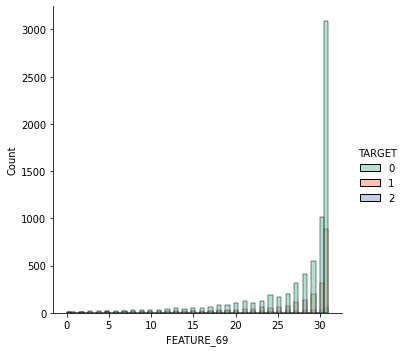

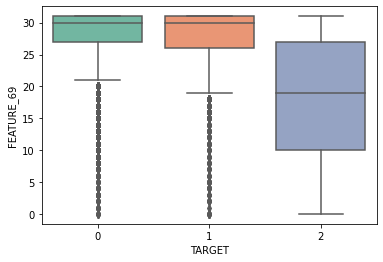

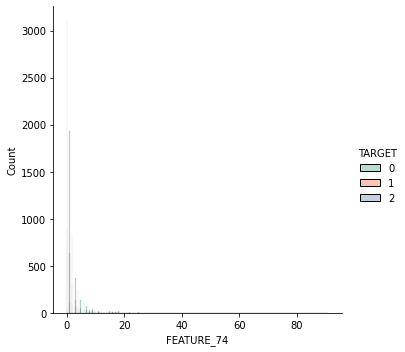

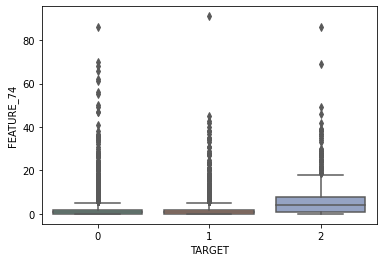

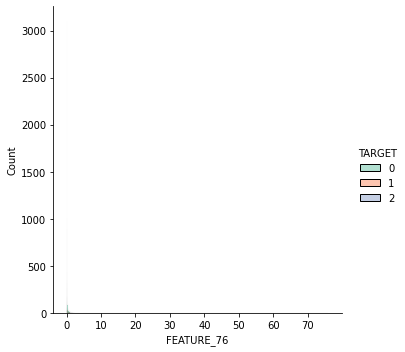

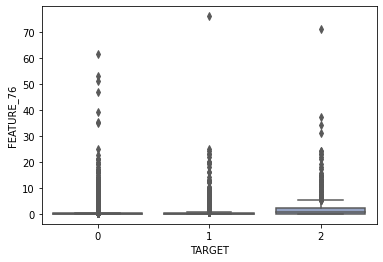

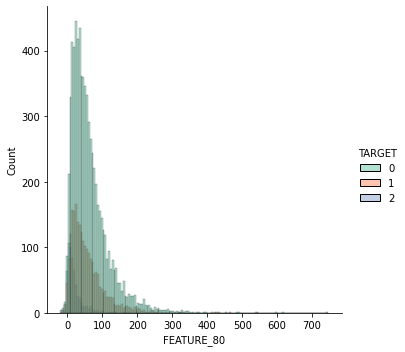

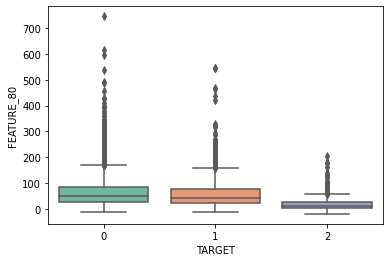

In [9]:
for column in high_correlated_targets.index:
    sns.displot(data=train_df, x=column, hue="TARGET",palette="Set2")
    plt.show()
    sns.boxplot(data=train_df, x='TARGET', y=column, palette="Set2")
    plt.show()
    

In [10]:
robust_scaler = RobustScaler()
train_df.iloc[:,1:] = robust_scaler.fit_transform(train_df.iloc[:,1:])

In [11]:
print(train_df[train_df["TARGET"] == 0].shape)
print(train_df[train_df["TARGET"] == 1].shape)
print(train_df[train_df["TARGET"] == 2].shape)

(7093, 99)
(2283, 99)
(623, 99)


Let's oversample data for better training

In [12]:
df_class_0 = train_df[train_df["TARGET"] == 0]
df_class_1 = train_df[train_df["TARGET"] == 1]
df_class_2 = train_df[train_df["TARGET"] == 2]


In [13]:
df_class_1_over = df_class_1.sample(len(df_class_0), replace=True)
df_class_2_over = df_class_2.sample(len(df_class_0), replace=True)

train_df = pd.concat([df_class_0, df_class_1_over, df_class_2_over], axis=0)
train_df = train_df.sample(n = len(train_df))
print(train_df.shape)

(21279, 99)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

Y_train=train_df.iloc[:,0]
X_train=train_df.iloc[:,1:]

x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

print(y_train.shape,x_train.shape,x_valid.shape,y_valid.shape)

ADA = AdaBoostClassifier()
KNN = KNeighborsClassifier()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
SVM = SVC()

k_range = [2,6,10]
knn_param_grid = dict(n_neighbors = k_range)
svc_param_grid = {'C': [0.1, 1, 5], 'gamma': [1,0.1]}
ada_param_grid = {
              'n_estimators':[50,250],
              'learning_rate':[0.01,0.1]
              }
rf_param_grid = { 
    'n_estimators': [100, 500],
    'max_depth' : [4,8],
}

skf = StratifiedKFold(n_splits=4)

gsADA = GridSearchCV(ADA,param_grid = ada_param_grid, cv=skf, scoring="f1_micro", n_jobs= 4, verbose = 1)
gsKNN = GridSearchCV(KNN,param_grid = knn_param_grid, cv=skf, scoring="f1_micro", n_jobs= 4, verbose = 1)
gsSVC = GridSearchCV(SVM,param_grid = svc_param_grid, cv=skf, scoring="f1_micro", n_jobs= 4, verbose = 1)
gsRF = GridSearchCV(RF,param_grid = rf_param_grid, cv=skf, scoring="f1_micro", n_jobs= 4, verbose = 1)

DT_fit = DT.fit(x_train,y_train)
print("DT ready")
gsADA_fit = gsADA.fit(x_train,y_train)
print("ADA ready")
gsKNN_fit = gsKNN.fit(x_train,y_train)
print("KNN ready")
gsSVC_fit = gsSVC.fit(x_train,y_train)
print("SVC ready")
gsRF_fit = gsRF.fit(x_train,y_train)
print('RF ready')


(17023,) (17023, 98) (4256, 98) (4256,)
DT ready
Fitting 4 folds for each of 4 candidates, totalling 16 fits
ADA ready
Fitting 4 folds for each of 3 candidates, totalling 12 fits
KNN ready
Fitting 4 folds for each of 6 candidates, totalling 24 fits
SVC ready
Fitting 4 folds for each of 4 candidates, totalling 16 fits
RF ready


In [15]:
print("RF best params = ",gsRF.best_params_)
print("Adaboost best params = ",gsADA.best_params_)
print("SVM best params = ",gsSVC.best_params_)
print("KNN best params = ",gsKNN.best_params_)

RF best params =  {'max_depth': 8, 'n_estimators': 500}
Adaboost best params =  {'learning_rate': 0.1, 'n_estimators': 250}
SVM best params =  {'C': 1, 'gamma': 1}
KNN best params =  {'n_neighbors': 2}


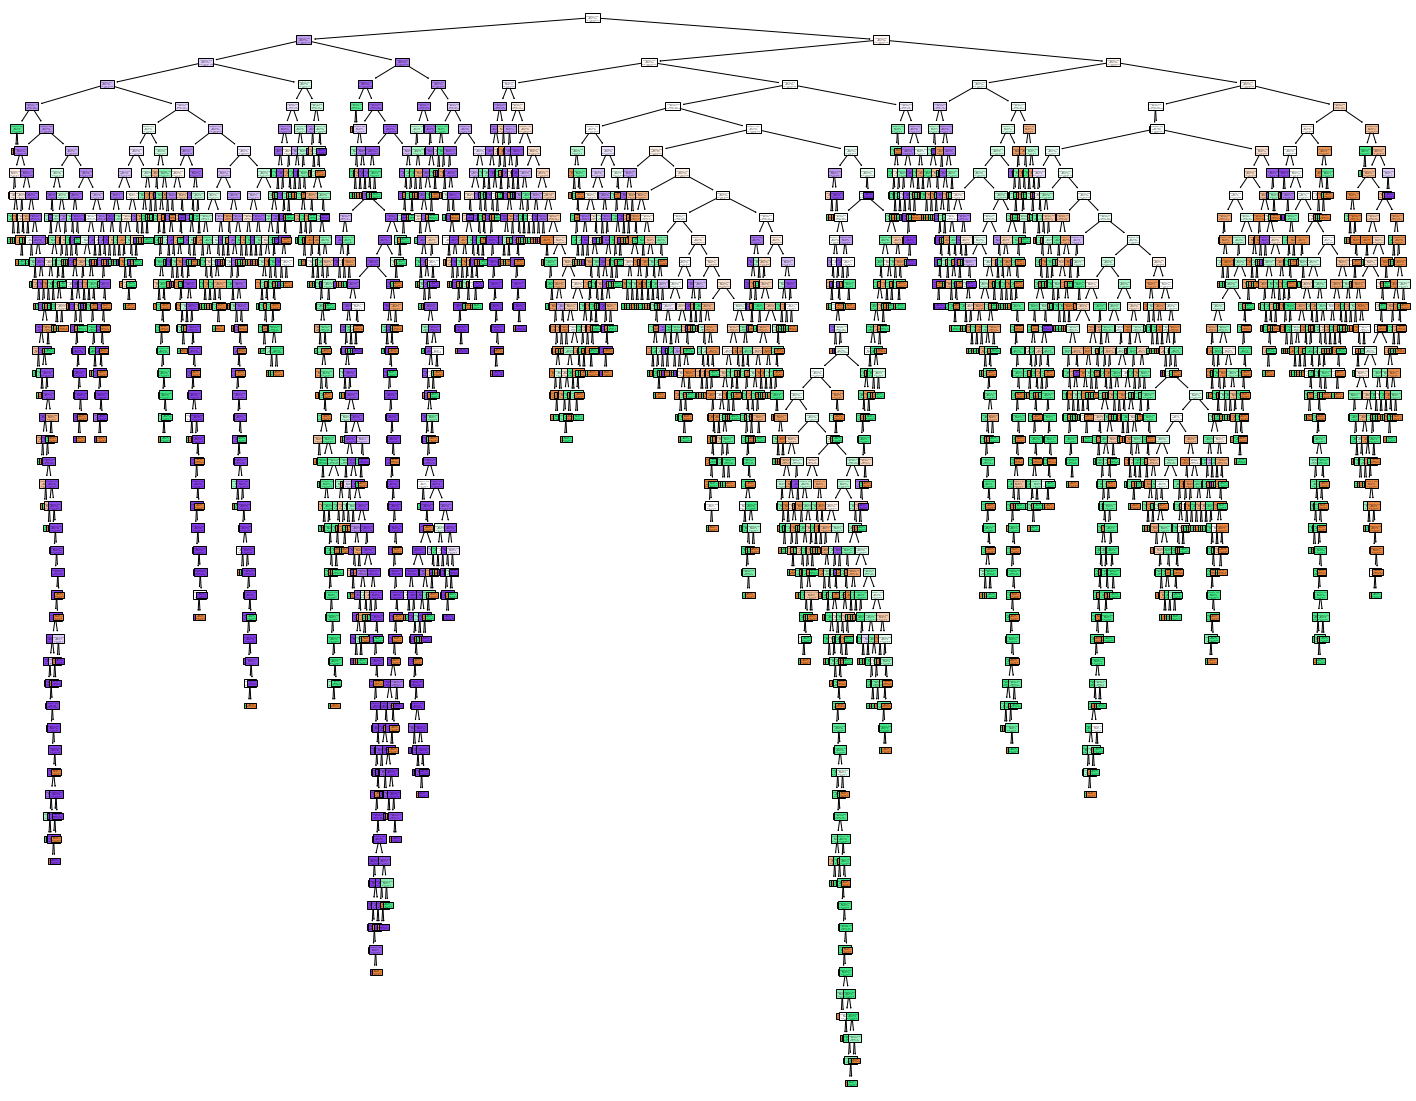

In [17]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DT_fit, 
                   feature_names=X_train.columns,  
                   class_names=['0','1','2'],
                   filled=True)

In [18]:
DT_prediction = DT_fit.predict(x_valid)
RF_prediction = gsRF_fit.predict(x_valid)
KNN_prediction = gsKNN_fit.predict(x_valid)
SVC_prediction = gsSVC_fit.predict(x_valid)
ADA_prediction = gsADA_fit.predict(x_valid)

In [19]:
from sklearn.metrics import f1_score

print("DT score = ",f1_score(y_valid, DT_prediction, average='micro'))
print("RF score = ",f1_score(y_valid, RF_prediction, average='micro'))
print("KNN score = ",f1_score(y_valid, KNN_prediction, average='micro'))
print("SVC score = ",f1_score(y_valid, SVC_prediction, average='micro'))
print("ADAboost score = ",f1_score(y_valid, ADA_prediction, average='micro'))

DT score =  0.8742951127819549
RF score =  0.7469454887218046
KNN score =  0.8315319548872181
SVC score =  0.9713345864661654
ADAboost score =  0.5359492481203008


              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1412
           1       1.00      0.92      0.96      1438
           2       1.00      1.00      1.00      1406

    accuracy                           0.97      4256
   macro avg       0.97      0.97      0.97      4256
weighted avg       0.97      0.97      0.97      4256



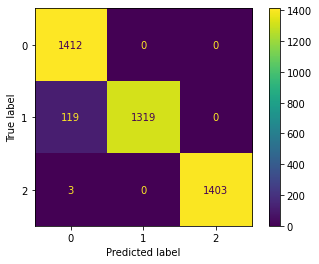

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_valid, SVC_prediction, target_names=['0','1','2']))

cm = confusion_matrix(y_valid, SVC_prediction, labels=gsSVC_fit.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gsSVC_fit.classes_)
disp.plot()

plt.show()
